# Notebook Overview

## IMPORTANT: I've added a "chatty" option that makes the algorithm describe itself!

### These are present in the Jove calls at the bottom of this notebook

## Watch from the 1-min mark of the first video below and 34th-min mark of the second

### These videos were used in previous classes.

In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
import sys

# -- Detect if in Own Install or in Colab
try:
    import google.colab
    OWN_INSTALL = False
except:
    OWN_INSTALL = True
    
if OWN_INSTALL:
    
  #---- Leave these definitions ON if running on laptop
  #---- Else turn OFF by putting them between ''' ... '''

  sys.path[0:0] = ['../../../../..',  '../../../../../3rdparty',  
                   '../../../..',  '../../../../3rdparty',  
                   '../../..',     '../../../3rdparty', 
                   '../..',        '../../3rdparty',
                   '..',           '../3rdparty' ]

else: # In colab
  ! if [ ! -d Jove ]; then git clone https://github.com/ganeshutah/Jove Jove; fi
  sys.path.append('./Jove')
  sys.path.append('./Jove/jove')

# -- common imports --
from jove.DotBashers import *
from jove.Def_md2mc  import *
from jove.Def_DFA    import *
from jove.Def_NFA    import *
from jove.LangDef    import *  # for testing DFA actions
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Cloning into 'Jove'...
remote: Enumerating objects: 5485, done.
remote: Counting objects: 100% (851/851), done.
remote: Compressing objects: 100% (600/600), done.
remote: Total 5485 (delta 446), reused 612 (delta 223), pack-reused 4634
Receiving objects: 100% (5485/5485), 8.30 MiB | 15.63 MiB/s, done.
Resolving deltas: 100% (3451/3451), done.
You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(mkp_dfa)
help(mk_dfa)
help(totalize_dfa)
help(addtosigma_delta)
help(step_dfa)
help(run_dfa)
help(accepts_dfa)
help(comp_dfa)
help(union_dfa)
help(intersect_dfa)
help(pruneUnreach)
help(iso_dfa)
help(langeq_dfa)
help(same_status)
help(h_langeq_dfa)
help(fixptDist)
help(min_dfa)
help(pairFR

# DFA Minimization

This is a good juncture at which to introduce DFA minimization. 
 

# Example DFA to minimize

## Figure 6.7 (Page 74) from our Book

In [ ]:
book_fig_67 = md2mc('''DFA

IS1 : a -> FS2
IS1 : b -> FS3

FS2 : a -> S4
FS2 : b -> S5   

FS3 : a -> S5
FS3 : b -> S4

S4 : a|b -> FS6

S5 : a|b -> FS6

FS6 : a|b -> FS6

''')

Generating LALR tables


# NEW: The chatty option makes the code execution apparent!

In [ ]:
min_book_fig_67 = min_dfa(book_fig_67, chatty=True, state_name_mode='verbose')

Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  FS6  and  S4  are 0-distinguished.
States  FS6  and  S5  are 0-distinguished.
States  FS6  and  IS1  are 0-distinguished.
States  S4  and  FS3  are 0-distinguished.
States  S4  and  FS2  are 0-distinguished.
States  S5  and  FS3  are 0-distinguished.
States  S5  and  FS2  are 0-distinguished.
States  FS3  and  IS1  are 0-distinguished.
States  FS2  and  IS1  are 0-distinguished.
 
Seeing if states  FS6  and  FS3  can now be distinguished by any symbol.
   The next states reached via symbol  a  are:  FS6  and  S5
   Found a distinguishable pair!
      Since  ('FS6', 'S5')  are  0  distinguishable, marking  ('FS6', 'FS3')  as  1  distinguishable.
         Hence, must continue through one more sweep of the algorithm.
 
Seeing if states  FS6  and  FS2  can now be distinguished by any symbol.
   The next states reached via symbol  a  are:  FS6  and  S4
   Found a distingu

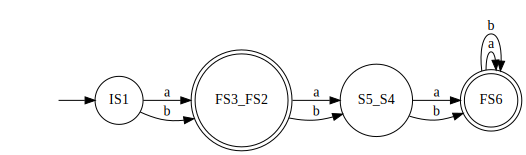

In [ ]:
dotObj_dfa(min_book_fig_67, STATENAME_MAXSIZE=20)

In [ ]:
blimp = md2mc('''
DFA 
I1 : a -> F2
I1 : b -> F3
F2 : a -> S8
F2 : b -> S5
F3 : a -> S7
F3 : b -> S4
S4 : a | b -> F6
S5 : a | b -> F6
F6 : a | b -> F6
S7 : a | b -> F6
S8 : a -> F6
S8 : b -> F9
F9 : a -> F9
F9 : b -> F6
''')

In [ ]:
help(dotObj_dfa)

Help on function dotObj_dfa in module jove.DotBashers:

dotObj_dfa(D, FuseEdges=False, dfaName='do_', STATENAME_MAXSIZE=20)
    In : D1 (DFA : partially consistent)
         dfaName (string)
         STATENAME_MAXSIZE : number
    Out: A dot object. 
    Generate a dot object representing the automaton. 
    Suppress "black-hole states".



In [ ]:
help(min_dfa)

Help on function min_dfa in module jove.Def_DFA:

min_dfa(D, state_name_mode='succinct', chatty=False)
    The top-level callable DFA minimizer.
    
    In : D (consistent DFA to be minimized)
    Out: Minimized version of D.
    
    Given a DFA D, go through the state minimization algorithm.
    
    Setting chatty=True helps reveal the detailed steps. Please try it!        
    
    If the state_name_mode is verbose, we will make state names
    by stringing together the state names in the equivalence
    classes. If 'succinct', then only the name of the equivalence-class
    representative is retained.



# NEW: The chatty option makes the code execution apparent!

In [ ]:
min_blimp = min_dfa(blimp, chatty=True, state_name_mode='verbose') 

Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  S7  and  F3  are 0-distinguished.
States  S7  and  F2  are 0-distinguished.
States  S7  and  F9  are 0-distinguished.
States  S7  and  F6  are 0-distinguished.
States  S4  and  F3  are 0-distinguished.
States  S4  and  F2  are 0-distinguished.
States  S4  and  F9  are 0-distinguished.
States  S4  and  F6  are 0-distinguished.
States  F3  and  I1  are 0-distinguished.
States  F3  and  S5  are 0-distinguished.
States  F3  and  S8  are 0-distinguished.
States  I1  and  F2  are 0-distinguished.
States  I1  and  F9  are 0-distinguished.
States  I1  and  F6  are 0-distinguished.
States  F2  and  S5  are 0-distinguished.
States  F2  and  S8  are 0-distinguished.
States  S5  and  F9  are 0-distinguished.
States  S5  and  F6  are 0-distinguished.
States  S8  and  F9  are 0-distinguished.
States  S8  and  F6  are 0-distinguished.
 
Seeing if states  S7  and  S4  can now be dis

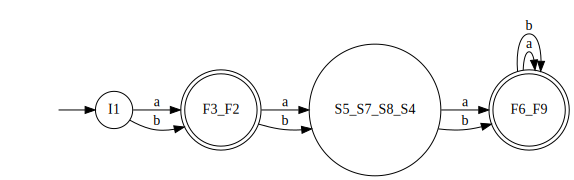

In [ ]:
dotObj_dfa(min_blimp, STATENAME_MAXSIZE=20)

In [8]:
ADFA = md2mc('''DFA

I : a -> A
I : b -> B

A : a -> A
A : b -> C   

B : a -> A
B : b -> B

C : a -> A
C : b -> F

F : a -> A
F : b -> B

''')

In [9]:
print(ADFA)

{'Q': {'I', 'A', 'C', 'F', 'B'}, 'Sigma': {'b', 'a'}, 'Delta': {('I', 'a'): 'A', ('I', 'b'): 'B', ('A', 'a'): 'A', ('A', 'b'): 'C', ('B', 'a'): 'A', ('B', 'b'): 'B', ('C', 'a'): 'A', ('C', 'b'): 'F', ('F', 'a'): 'A', ('F', 'b'): 'B'}, 'q0': 'I', 'F': {'F'}}


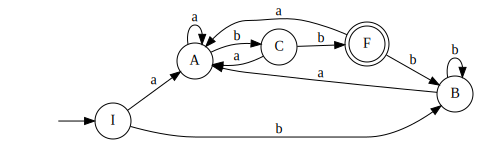

In [10]:
dotObj_dfa(ADFA)

In [11]:
minADFA = min_dfa(ADFA, chatty=True, state_name_mode='verbose')

Separating final and non-final states (marking 0-distinguishable entries).
   The 0-distinguishable entries are:
States  I  and  F  are 0-distinguished.
States  A  and  F  are 0-distinguished.
States  C  and  F  are 0-distinguished.
States  F  and  B  are 0-distinguished.
 
Seeing if states  I  and  A  can now be distinguished by any symbol.
   The next states reached via symbol  b  are:  B  and  C
   Cannot distinguish yet, via  b
   The next states reached via symbol  a  are:  A  and  A
      Nope. Symbol  a  could not distinguish (the next states are the same).
 
Seeing if states  I  and  C  can now be distinguished by any symbol.
   The next states reached via symbol  b  are:  B  and  F
   Found a distinguishable pair!
      Since  ('B', 'F')  are  0  distinguishable, marking  ('I', 'C')  as  1  distinguishable.
         Hence, must continue through one more sweep of the algorithm.
 
Seeing if states  I  and  B  can now be distinguished by any symbol.
   The next states reached via

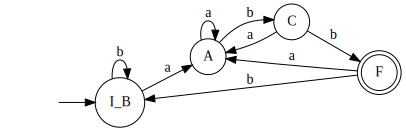

In [12]:
dotObj_dfa(minADFA, STATENAME_MAXSIZE=20)

In [4]:
DFA2 = md2mc('''DFA

I : a -> A
I : b -> I

A : a -> A
A : b -> F

F : a|b -> F   

''')

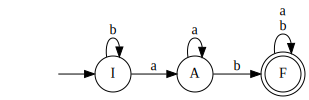

In [6]:
dotObj_dfa(DFA2,FuseEdges=True)